# Experiments executor for the Random-pMedici mix project

In [117]:
# Library imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Data preparation

In [118]:
# Import the experiment data
data = pd.read_csv("experiments.csv")

# Remove all rows having 'timeout' in the TSSize column
data = data[data.TSSize != 'timeout'] 

# Set the correct data types for all columns
data['TSTime'] = data['TSTime'].astype(float)
data['TSSize'] = data['TSSize'].astype(float)
data['cRnd'] = pd.to_numeric(data['cRnd'])
data['cInc'] = pd.to_numeric(data['cInc'])
data['relCRnd'] = pd.to_numeric(data['relCRnd'])
data['relCInc'] = pd.to_numeric(data['relCInc'])

In [119]:
# Summary data
cInc = data['relCInc'].mean()
print("Average relCInc: " + str(cInc))
print("Average relCRnd: " + str(data['relCRnd'].mean()))
print("----------")
# For all the possible values of the column t, compute the averate relCInc and relCRnd
for t in data.t.unique():
    print("t = " + str(t))
    print("Average relCInc: " + str(data[data.t == t]['relCInc'].mean()))
    print("Average relCRnd: " + str(data[data.t == t]['relCRnd'].mean()))
    print("----------")

Average relCInc: 0.05620961657586456
Average relCRnd: 0.22243505319360324
----------
t = 2
Average relCInc: 0.039988419774924046
Average relCRnd: 0.14090611978565065
----------
t = 3
Average relCInc: 0.06194995449776483
Average relCRnd: 0.2594741904092385
----------
t = 4
Average relCInc: 0.09114581283933203
Average relCRnd: 0.37073437383466085
----------


## Best execution (*time*)

In [120]:
# New dataframe associating the model with the expected seed size
expectedSizes = pd.DataFrame(columns=['model', 'expectedSeedSize', 't', 'usedSeedSize'])

# For each model in FileName, extract the line with the best TSTime
print("t,model,usedSeedSize,expectedSeedSize")
for t in data.t.unique():
    for model in data.FileName.unique():
        v = data[(data.t == t) & (data.FileName == model)].iloc[0]['v']
        
        print(str(t) + "," + str(model) + "," + str(data[(data.t == t) & (data.FileName == model)].sort_values(by=['TSTime']).head(1).iloc[0]['UsedSeedSize']) + "," + 
              str(math.log10( -(cInc * float(v) ** (-t))/(math.log10( 1 - float(v) ** (-t))) ) / math.log10( 1 - float(v) ** (-t))))
        
        expectedSizes = expectedSizes.append({'model': model, 
                                              'expectedSeedSize': math.log10( -(cInc * float(v) ** (-t))/(math.log10( 1 - float(v) ** (-t))) ) / math.log10( 1 - float(v) ** (-t)), 
                                              'usedSeedSize': data[(data.t == t) & (data.FileName == model)].sort_values(by=['TSTime']).head(1).iloc[0]['UsedSeedSize'],
                                              't': t}, ignore_index=True)

t,model,usedSeedSize,expectedSeedSize
2,benchmark1,36,99.66042408211135
2,UNIFORM_ALL_0,22,17.854426283012064
2,UNIFORM_ALL_1,2,17.854426283012064
2,UNIFORM_ALL_12,55,50.584900755435534
2,UNIFORM_ALL_9,2,7.595294335910054
2,UNIFORM_BOOLEAN_0,0,7.595294335910054
2,UNIFORM_BOOLEAN_1,1,7.595294335910054
2,UNIFORM_BOOLEAN_11,3,7.595294335910054
2,UNIFORM_BOOLEAN_12,1,7.595294335910054
2,UNIFORM_BOOLEAN_13,8,7.595294335910054
2,UNIFORM_BOOLEAN_2,3,7.595294335910054
2,UNIFORM_BOOLEAN_4,5,7.595294335910054
2,UNIFORM_BOOLEAN_6,11,7.595294335910054
2,UNIFORM_BOOLEAN_7,1,7.595294335910054
2,UNIFORM_BOOLEAN_8,26,7.595294335910054
2,UNIFORM_BOOLEAN_9,4,7.595294335910054
3,benchmark1,19,700.7868608399975
3,UNIFORM_ALL_0,45,54.67482414237039
3,UNIFORM_ALL_1,170,54.67482414237039
3,UNIFORM_ALL_12,162,255.05535152012203
3,UNIFORM_ALL_9,22,15.806454199111657
3,UNIFORM_BOOLEAN_0,32,15.806454199111657
3,UNIFORM_BOOLEAN_1,19,15.806454199111657
3,UNIFORM_BOOLEAN_11,16,15.806454199111657
3,UNIFORM_BOOLEAN_1

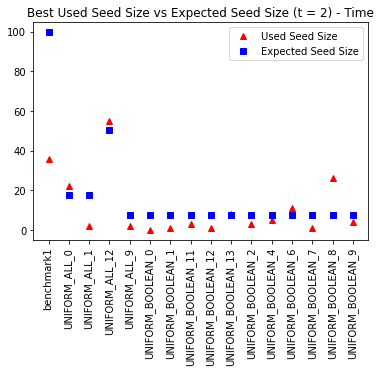

In [121]:
# Plot the data in two different series. On the X axis, the model name, on the Y axis the usedSeedSize in a series, and the expectedSeedSize in another series
plt.plot(expectedSizes[(expectedSizes.t == 2)].model, expectedSizes[(expectedSizes.t == 2)].usedSeedSize, 'r^', expectedSizes[(expectedSizes.t == 2)].model, expectedSizes[(expectedSizes.t == 2)].expectedSeedSize, 'bs')
plt.xticks(rotation = 90)
plt.title('Best Used Seed Size vs Expected Seed Size (t = 2) - Time')
plt.legend(['Used Seed Size', 'Expected Seed Size'])
plt.show()

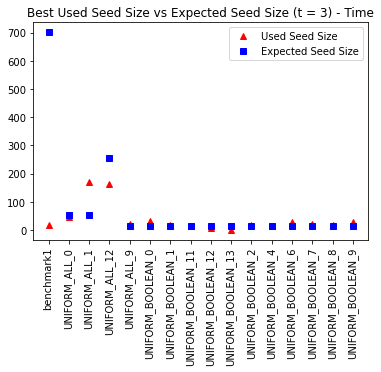

In [122]:
# Plot the data in two different series. On the X axis, the model name, on the Y axis the usedSeedSize in a series, and the expectedSeedSize in another series
plt.plot(expectedSizes[(expectedSizes.t == 3)].model, expectedSizes[(expectedSizes.t == 3)].usedSeedSize, 'r^', expectedSizes[(expectedSizes.t == 3)].model, expectedSizes[(expectedSizes.t == 3)].expectedSeedSize, 'bs')
plt.xticks(rotation = 90)
plt.title('Best Used Seed Size vs Expected Seed Size (t = 3) - Time')
plt.legend(['Used Seed Size', 'Expected Seed Size'])
plt.show()

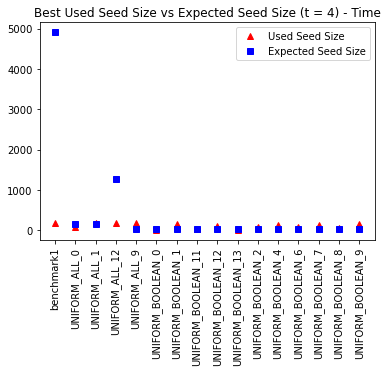

In [123]:
# Plot the data in two different series. On the X axis, the model name, on the Y axis the usedSeedSize in a series, and the expectedSeedSize in another series
plt.plot(expectedSizes[(expectedSizes.t == 4)].model, expectedSizes[(expectedSizes.t == 4)].usedSeedSize, 'r^', expectedSizes[(expectedSizes.t == 4)].model, expectedSizes[(expectedSizes.t == 4)].expectedSeedSize, 'bs')
plt.xticks(rotation = 90)
plt.title('Best Used Seed Size vs Expected Seed Size (t = 4) - Time')
plt.legend(['Used Seed Size', 'Expected Seed Size'])
plt.show()

## Best Execution (*size*)

In [124]:
# New dataframe associating the model with the expected seed size
expectedSizes = pd.DataFrame(columns=['model', 'expectedSeedSize', 't', 'usedSeedSize'])

# For each model in FileName, extract the line with the best TSSize
print("t,model,usedSeedSize,expectedSeedSize")
for t in data.t.unique():
    for model in data.FileName.unique():
        v = data[(data.t == t) & (data.FileName == model)].iloc[0]['v']
        print(str(t) + "," + str(model) + "," + str(data[(data.t == t) & (data.FileName == model)].sort_values(by=['TSSize']).head(1).iloc[0]['UsedSeedSize']) + "," + 
              str(math.log10( -(cInc * float(v) ** (-t))/(math.log10( 1 - float(v) ** (-t))) ) / math.log10( 1 - float(v) ** (-t))))
        
        expectedSizes = expectedSizes.append({'model': model, 
                                              'expectedSeedSize': math.log10( -(cInc * float(v) ** (-t))/(math.log10( 1 - float(v) ** (-t))) ) / math.log10( 1 - float(v) ** (-t)), 
                                              'usedSeedSize': data[(data.t == t) & (data.FileName == model)].sort_values(by=['TSSize']).head(1).iloc[0]['UsedSeedSize'],
                                              't': t}, ignore_index=True)

t,model,usedSeedSize,expectedSeedSize
2,benchmark1,28,99.66042408211135
2,UNIFORM_ALL_0,4,17.854426283012064
2,UNIFORM_ALL_1,11,17.854426283012064
2,UNIFORM_ALL_12,24,50.584900755435534
2,UNIFORM_ALL_9,10,7.595294335910054
2,UNIFORM_BOOLEAN_0,3,7.595294335910054
2,UNIFORM_BOOLEAN_1,6,7.595294335910054
2,UNIFORM_BOOLEAN_11,2,7.595294335910054
2,UNIFORM_BOOLEAN_12,7,7.595294335910054
2,UNIFORM_BOOLEAN_13,1,7.595294335910054
2,UNIFORM_BOOLEAN_2,8,7.595294335910054
2,UNIFORM_BOOLEAN_4,10,7.595294335910054
2,UNIFORM_BOOLEAN_6,11,7.595294335910054
2,UNIFORM_BOOLEAN_7,5,7.595294335910054
2,UNIFORM_BOOLEAN_8,3,7.595294335910054
2,UNIFORM_BOOLEAN_9,7,7.595294335910054
3,benchmark1,133,700.7868608399975
3,UNIFORM_ALL_0,17,54.67482414237039
3,UNIFORM_ALL_1,50,54.67482414237039
3,UNIFORM_ALL_12,145,255.05535152012203
3,UNIFORM_ALL_9,16,15.806454199111657
3,UNIFORM_BOOLEAN_0,11,15.806454199111657
3,UNIFORM_BOOLEAN_1,9,15.806454199111657
3,UNIFORM_BOOLEAN_11,10,15.806454199111657
3,UNIFORM_BOOLEAN_1

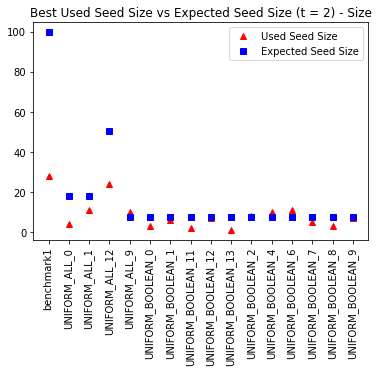

In [125]:
# Plot the data in two different series. On the X axis, the model name, on the Y axis the usedSeedSize in a series, and the expectedSeedSize in another series
plt.plot(expectedSizes[(expectedSizes.t == 2)].model, expectedSizes[(expectedSizes.t == 2)].usedSeedSize, 'r^', expectedSizes[(expectedSizes.t == 2)].model, expectedSizes[(expectedSizes.t == 2)].expectedSeedSize, 'bs')
plt.xticks(rotation = 90)
plt.title('Best Used Seed Size vs Expected Seed Size (t = 2) - Size')
plt.legend(['Used Seed Size', 'Expected Seed Size'])
plt.show()

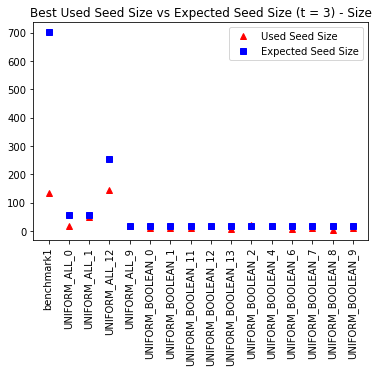

In [126]:
# Plot the data in two different series. On the X axis, the model name, on the Y axis the usedSeedSize in a series, and the expectedSeedSize in another series
plt.plot(expectedSizes[(expectedSizes.t == 3)].model, expectedSizes[(expectedSizes.t == 3)].usedSeedSize, 'r^', expectedSizes[(expectedSizes.t == 3)].model, expectedSizes[(expectedSizes.t == 3)].expectedSeedSize, 'bs')
plt.xticks(rotation = 90)
plt.title('Best Used Seed Size vs Expected Seed Size (t = 3) - Size')
plt.legend(['Used Seed Size', 'Expected Seed Size'])
plt.show()

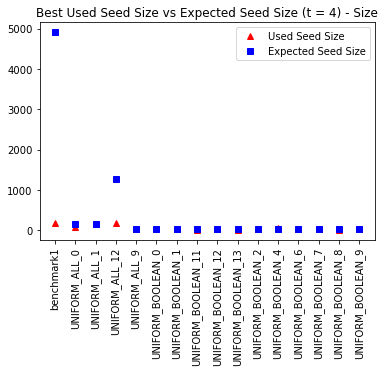

In [127]:
# Plot the data in two different series. On the X axis, the model name, on the Y axis the usedSeedSize in a series, and the expectedSeedSize in another series
plt.plot(expectedSizes[(expectedSizes.t == 4)].model, expectedSizes[(expectedSizes.t == 4)].usedSeedSize, 'r^', expectedSizes[(expectedSizes.t == 4)].model, expectedSizes[(expectedSizes.t == 4)].expectedSeedSize, 'bs')
plt.xticks(rotation = 90)
plt.title('Best Used Seed Size vs Expected Seed Size (t = 4) - Size')
plt.legend(['Used Seed Size', 'Expected Seed Size'])
plt.show()